#importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
dataset= pd.read_csv('diabetes.csv')
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


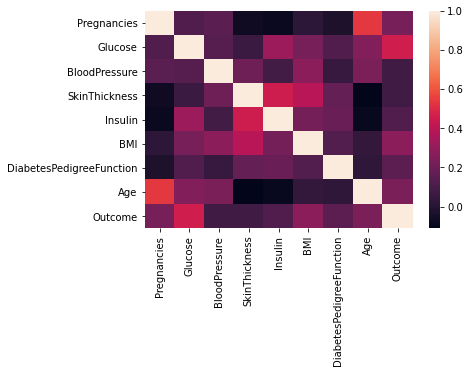

In [6]:
sns.heatmap(dataset.corr())

In [7]:
y.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

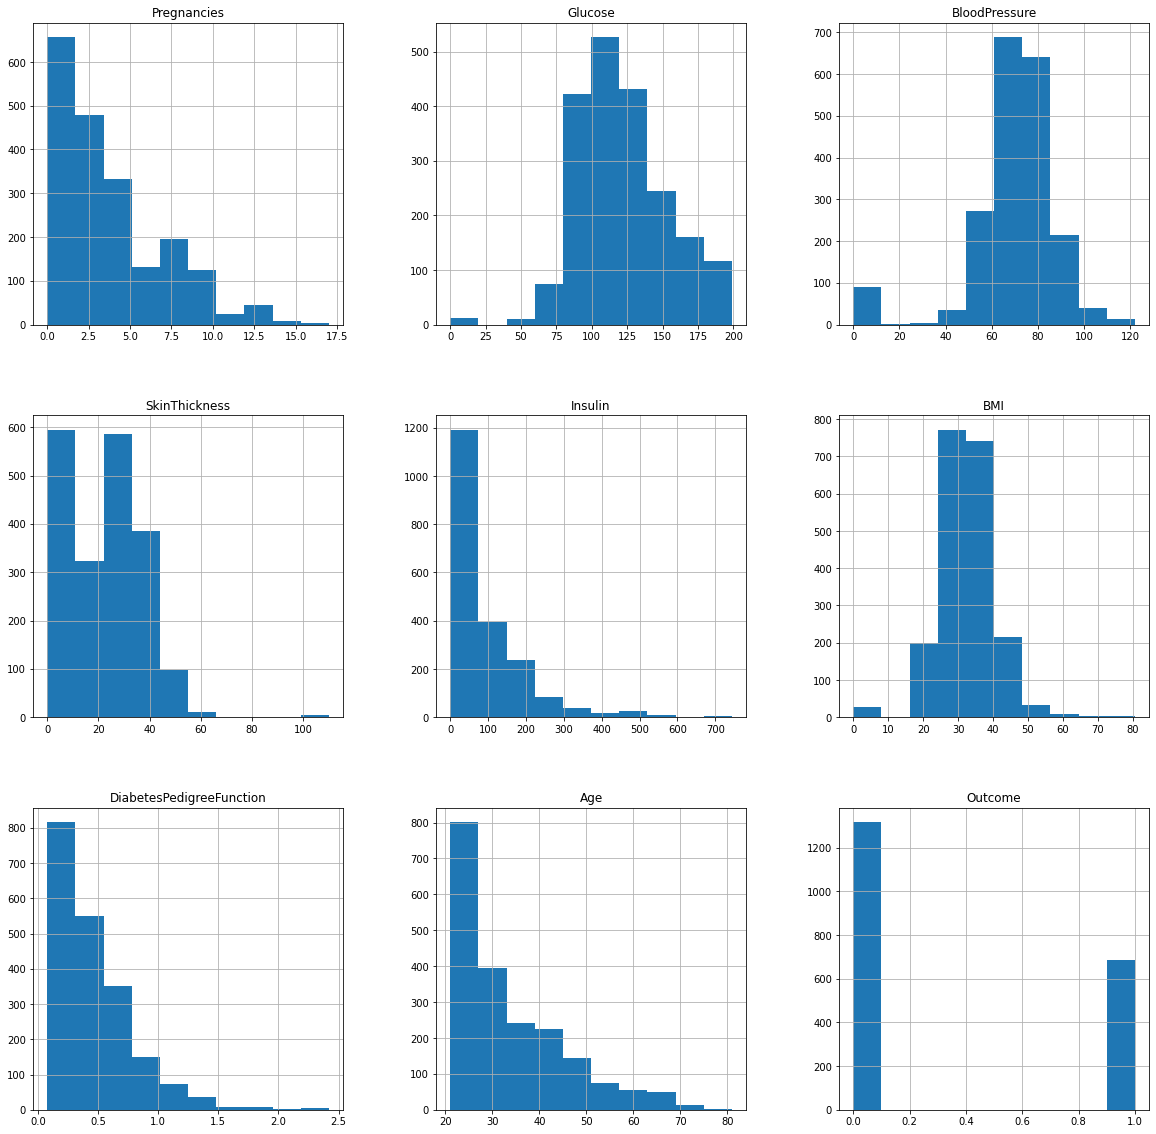

In [8]:
dataset.hist(figsize=(20,20));

# **Scaling Data**

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

# Spillting Data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 42) 
train_scores = []
test_scores = []

# Training the Logistic Regression model 

train_score classifier 0.768125
test_score classifier 0.79
[[232  21]
 [ 63  84]]


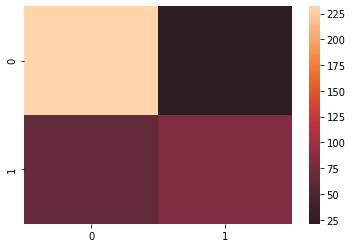

In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,C=1.0,max_iter=200)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#calculate the details Logistic Regression
print('train_score classifier',classifier.score(X_train,y_train))
print('test_score classifier',classifier.score(X_test,y_test))

train_scores.append(classifier.score(X_train,y_train))
test_scores.append(classifier.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()


# Support Vector Machines (SVM)

train_score svcmodel 0.8475
test_score svcmodel 0.845
[[237  16]
 [ 46 101]]


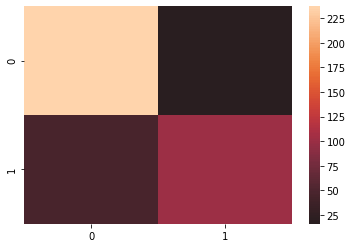

In [12]:
from sklearn.svm import SVC
svcmodel = SVC(kernel='rbf',degree=3)
svcmodel.fit(X_train,y_train)

# Predicting the Test set results SVM
y_pred = svcmodel.predict(X_test)

#calculate the details SVM
print('train_score svcmodel', svcmodel.score(X_train,y_train))
print('test_score svcmodel',svcmodel.score(X_test,y_test))

train_scores.append(svcmodel.score(X_train,y_train))
test_scores.append(svcmodel.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()


# KNN

train_score Knnclassifier_model 0.76625
test_score Knnclassifier_model 0.7525
[[239  14]
 [ 85  62]]


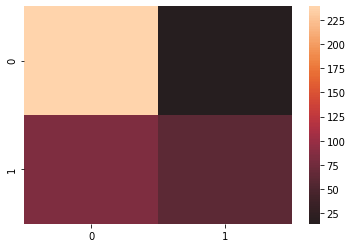

In [13]:
from sklearn.neighbors import KNeighborsClassifier
Knnclassifier_model = KNeighborsClassifier(n_neighbors=100 )
Knnclassifier_model.fit(X_train,y_train)

# Predicting the Test set results KNeighborsClassifier
y_pred = Knnclassifier_model.predict(X_test)

#calculate the details KNeighborsClassifier
print('train_score Knnclassifier_model', Knnclassifier_model.score(X_train,y_train))
print('test_score Knnclassifier_model',Knnclassifier_model.score(X_test,y_test))

train_scores.append(Knnclassifier_model.score(X_train,y_train))
test_scores.append(Knnclassifier_model.score(X_test,y_test))


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# Naive Bayes

train_score gussian_model 0.759375
test_score gussian_model 0.7775
[[220  33]
 [ 56  91]]


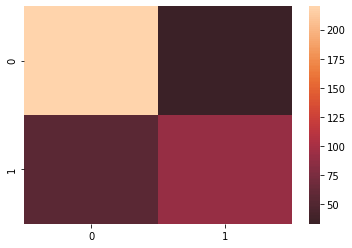

In [14]:
from sklearn.naive_bayes import GaussianNB
gussian_model = GaussianNB(priors=None, var_smoothing=1e-09)
gussian_model.fit(X_train,y_train)

# Predicting the Test set results Naive Bayes
y_pred = gussian_model.predict(X_test)

#calculate the details Naive Bayes
print('train_score gussian_model', gussian_model.score(X_train,y_train))
print('test_score gussian_model',gussian_model.score(X_test,y_test))


train_scores.append(gussian_model.score(X_train,y_train))
test_scores.append(gussian_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# DecisionTreeClassifier

train_score DT_model 1.0
test_score DT_model 0.975
[[245   8]
 [  2 145]]


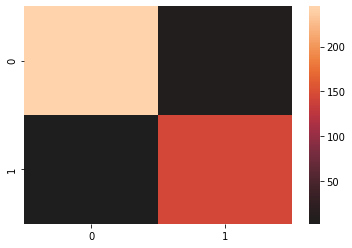

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(criterion='entropy')
DT_model.fit(X_train,y_train)

# Predicting the Test set results DecisionTreeClassifier Model
y_pred = DT_model.predict(X_test)

#calculate the details DecisionTreeClassifier Model
print('train_score DT_model', DT_model.score(X_train,y_train))
print('test_score DT_model',DT_model.score(X_test,y_test))

train_scores.append(DT_model.score(X_train,y_train))
test_scores.append(DT_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# NNClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


train_score mlp_model 0.85625
test_score mlp_model 0.84
[[229  24]
 [ 40 107]]


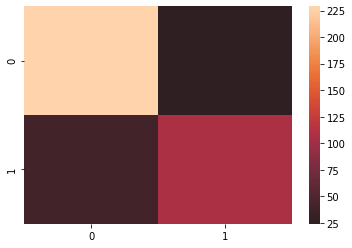

In [16]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=100 ,activation='relu',alpha=0.01,epsilon=1E-08)
mlp_model.fit(X_train,y_train)

# Predicting the Test set results NNClassifier Model
y_pred = mlp_model.predict(X_test)

#calculate the details NNClassifier Model
print('train_score mlp_model', mlp_model.score(X_train,y_train))
print('test_score mlp_model',mlp_model.score(X_test,y_test))

train_scores.append(mlp_model.score(X_train,y_train))
test_scores.append(mlp_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# RandomForestClassifier

train_score rfc 0.795
test_score rfc 0.7825
[[238  15]
 [ 72  75]]


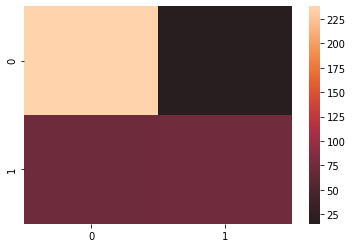

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(criterion='gini',n_estimators=200,max_depth=3)
rfc.fit(X_train,y_train)

# Predicting the Test set results RandomForestClassifier Model
y_pred = rfc.predict(X_test)

#calculate the details RandomForestClassifier Model
print('train_score rfc', rfc.score(X_train,y_train))
print('test_score rfc',rfc.score(X_test,y_test))

train_scores.append(rfc.score(X_train,y_train))
test_scores.append(rfc.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# visualization

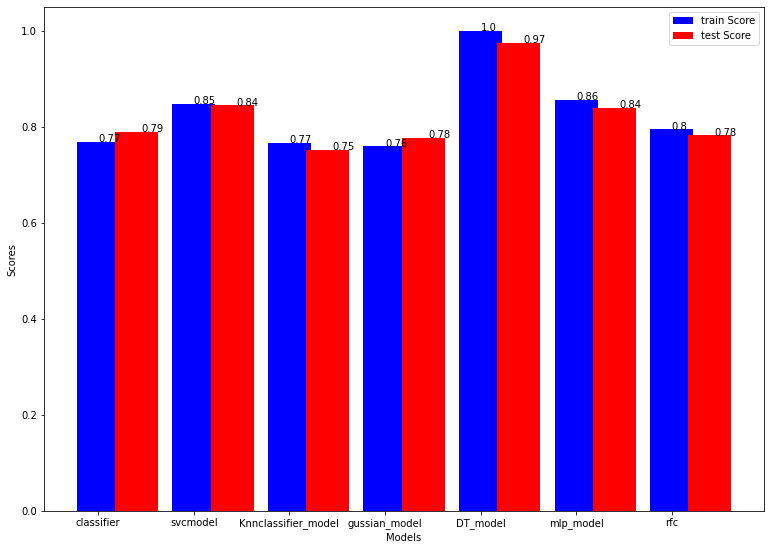

In [18]:
Labels = ['classifier', 'svcmodel', 'Knnclassifier_model', 'gussian_model','DT_model','mlp_model','rfc']
X = np.arange(1,8)
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
plt.style.context('ggplot')
ax.bar(X + 0.00, train_scores, color = 'b', width = 0.45,label = 'train Score')
ax.bar(X + 0.40, test_scores, color = 'r', width = 0.45,label = 'test Score')
for i,m in list(zip(X,train_scores)):
  plt.text(x = i ,y = m,s = float("{:.2f}".format(m)))
for i,m in list(zip(X,test_scores)):
  plt.text(x = i + 0.45 ,y = m,s = float("{:.2f}".format(m)))
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(X)
ax.set_xticklabels(Labels)
plt.legend()